In [7]:
import numpy as np
import pandas as pd

In [26]:
# загрузка датасета
path = 'https://raw.githubusercontent.com/Deniska400/DZ_OTUS/refs/heads/main/DZ_10/AB_NYC_2019.csv'
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
#Удалите столбцы, которые не несут полезной информации для модели:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)

In [4]:
#Проверяем базовую информацию
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Иследуем пропущенные значения
df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,10052
calculated_host_listings_count,0


In [28]:
#Заполняем пропущенные значения нулями
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

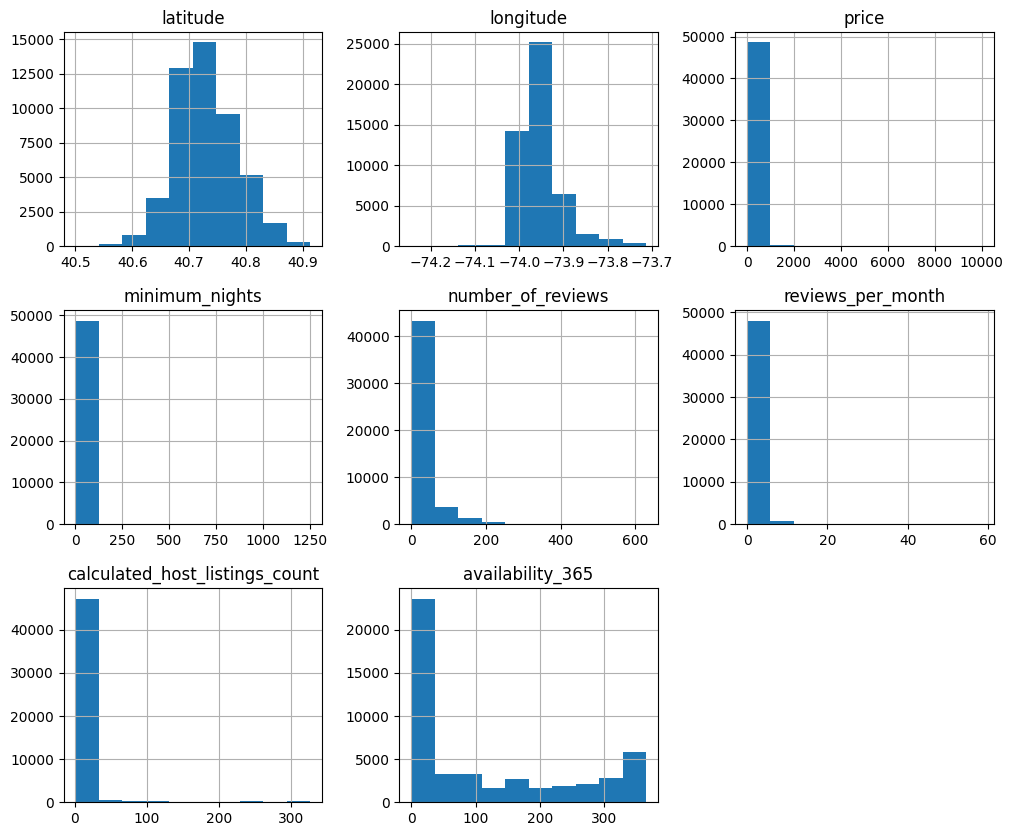

In [10]:
#Строим гистограммы для числовых признаков
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10))
plt.show()

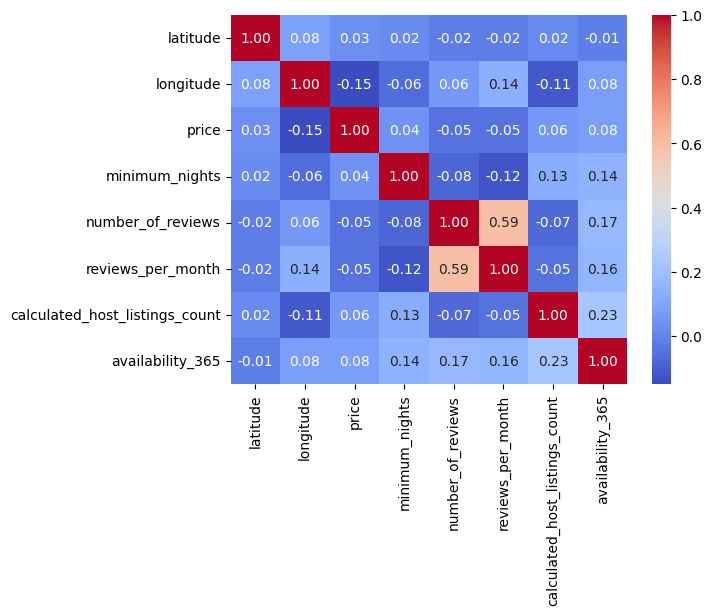

In [29]:
# Выбираем только числовые столбцы
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Строим heatmap только для числовых данных
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

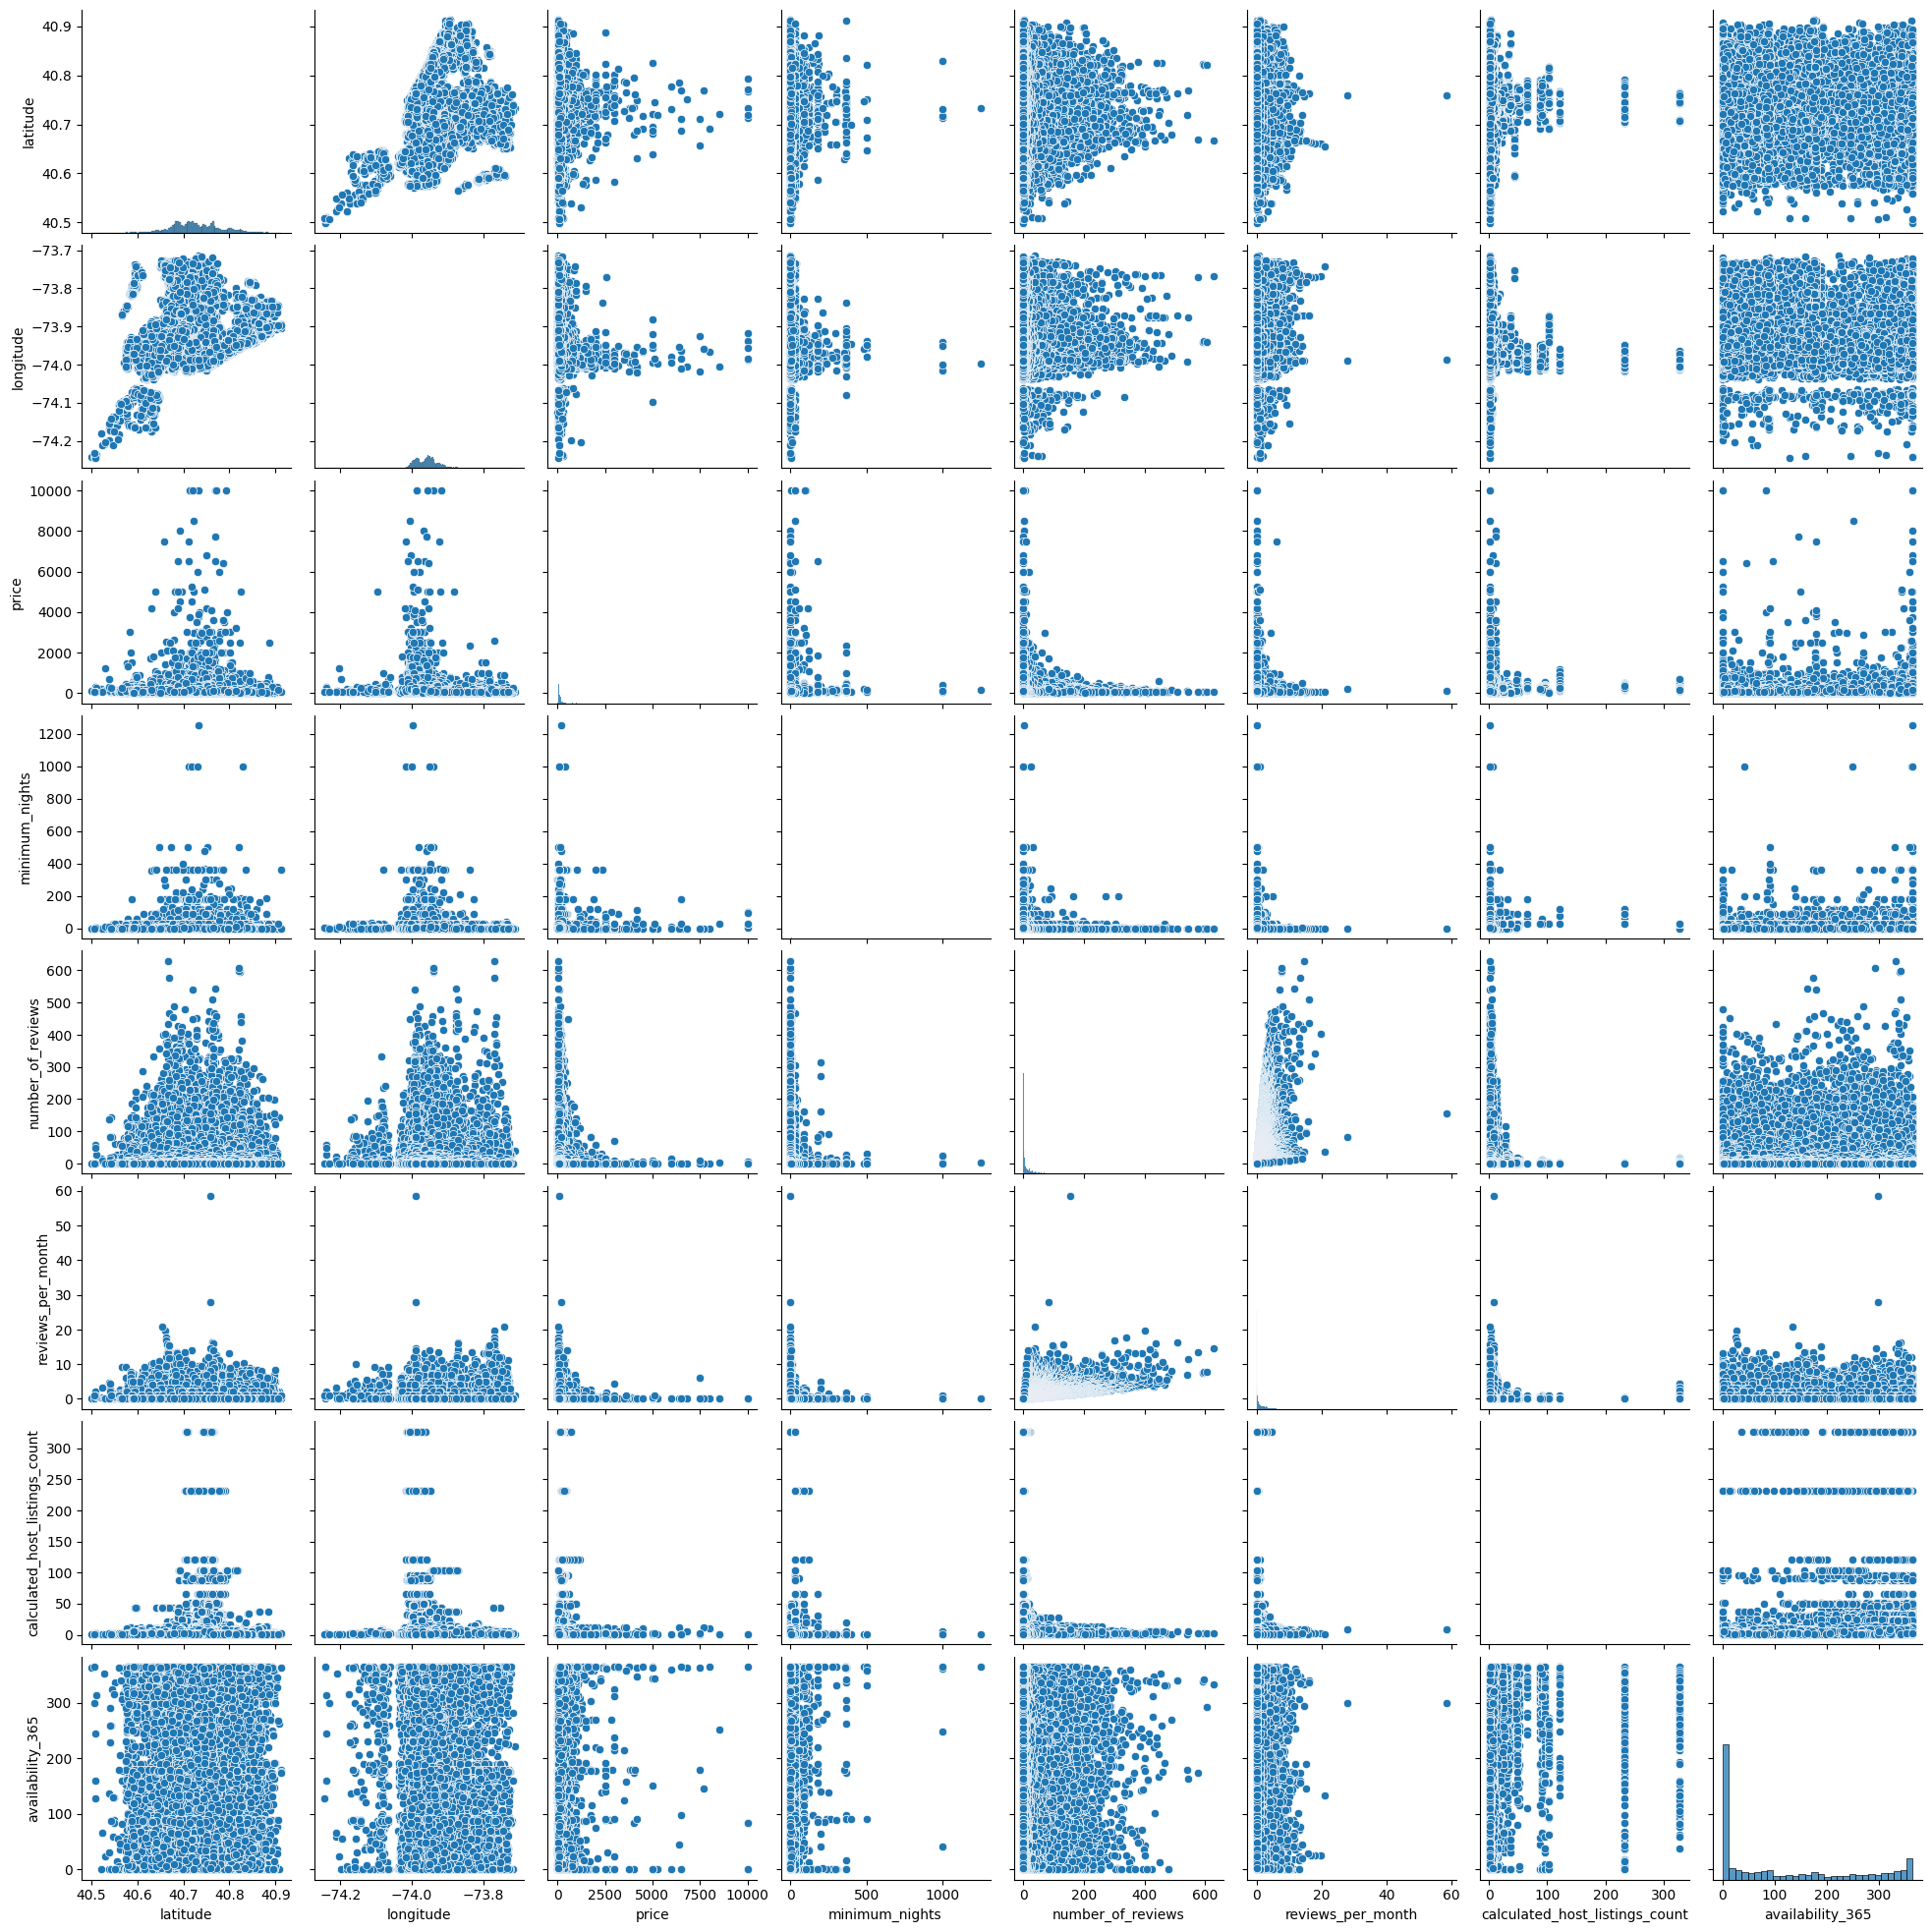

In [12]:
sns.pairplot(df)
plt.show()

In [30]:
#Преобразуем категориальные признаки в числовые
df = pd.get_dummies(df, columns=['neighbourhood', 'neighbourhood_group', 'room_type'], drop_first=True)

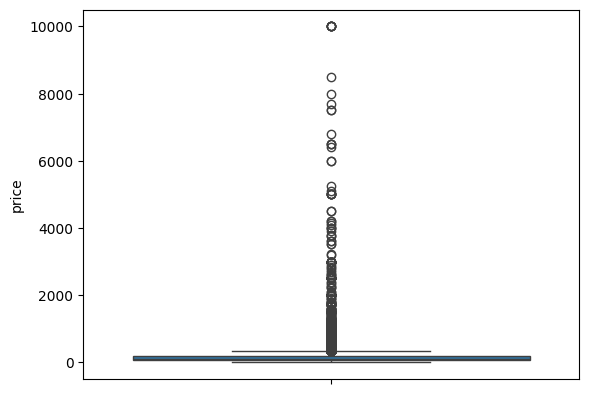

In [17]:
#Исследуем выбросы
sns.boxplot(df['price'])
plt.show()

In [31]:
#df = df[df['price'] < 500]  #Удаления дорогих объявлений

In [62]:
#Шкалирование данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']] = scaler.fit_transform(df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']])

In [63]:
import numpy as np

# Координаты центра Манхэттена
manhattan_center_lat = 40.7831
manhattan_center_lon = -73.9712

# Функция для расчета расстояния
def calculate_distance(lat, lon):
    return np.sqrt((lat - manhattan_center_lat)**2 + (lon - manhattan_center_lon)**2)

df['distance_to_manhattan'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude']), axis=1)

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Linear Regression R2:', r2_score(y_test, y_pred))

# Ridge
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Ridge R2:', r2_score(y_test, y_pred))

# Lasso
lasso = LassoCV(alphas=[0.1, 1.0, 10.0])
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Lasso R2:', r2_score(y_test, y_pred))

# ElasticNet
elastic = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], alphas=[0.1, 1.0, 10.0])
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)
print('ElasticNet R2:', r2_score(y_test, y_pred))

Linear Regression R2: 0.47206138477080495
Ridge R2: 0.4717104151095165
Lasso R2: 0.4604802267147796
ElasticNet R2: 0.44774013333286644


In [66]:
from sklearn.preprocessing import StandardScaler

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем Lasso на масштабированных данных
lasso = LassoCV(alphas=[0.1, 1.0, 10.0])
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=[0.1, 1.0, 10.0])

In [67]:
# Получаем ненулевые коэффициенты
nonzero_indices = np.where(lasso.coef_ != 0)[0]
nonzero_coef = lasso.coef_[nonzero_indices]
nonzero_features = X.columns[nonzero_indices]

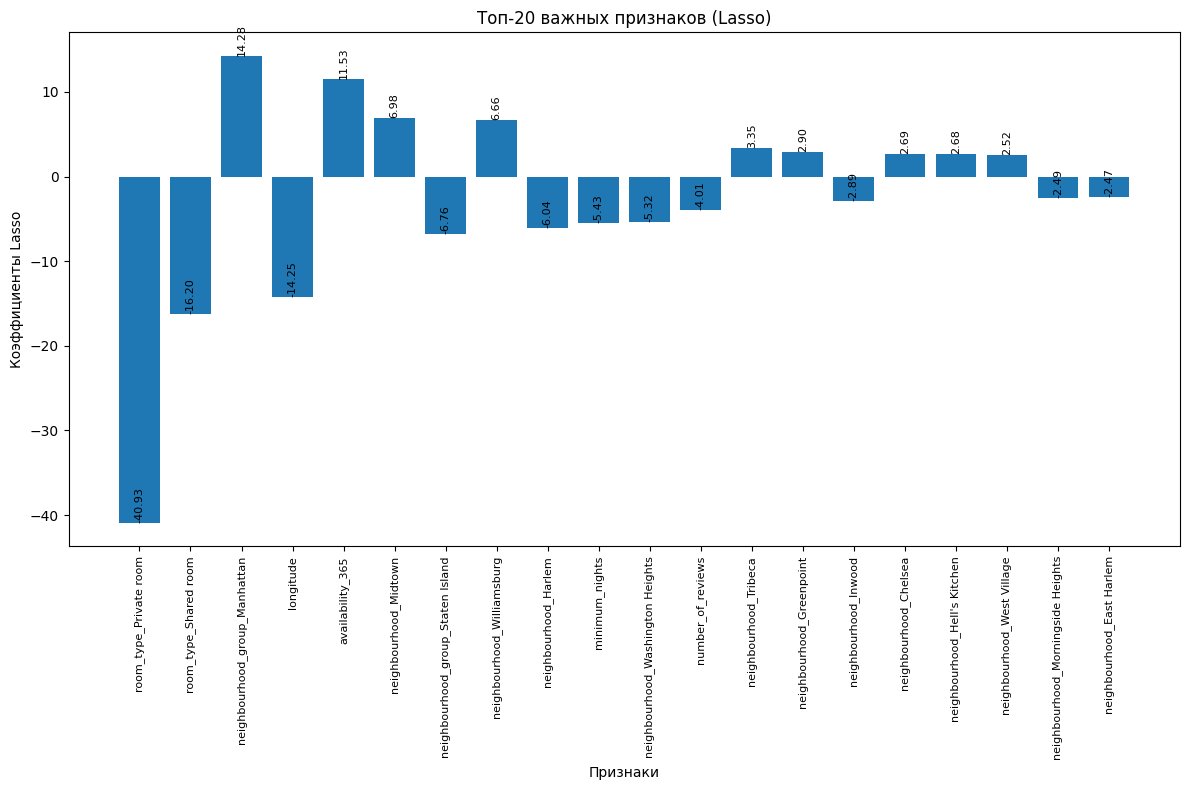

In [68]:
top_n = 20  # Показываем только топ-20 признаков
top_features = sorted_features[:top_n]
top_coef = sorted_coef[:top_n]

plt.figure(figsize=(12, 8))
bars = plt.bar(top_features, top_coef)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты Lasso')
plt.title(f'Топ-{top_n} важных признаков (Lasso)')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}',
             ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

In [93]:
#Логарифмуем целевую переменную
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [92]:
#Ограничиваем выбросы в числовых переменных
df = df[(df['price'] < 500) & (df['minimum_nights'] < 30) & (df['number_of_reviews'] < 200)]

In [94]:
#Генерируем новый признак
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Пример: расстояние до Таймс-сквер
times_square_lat = 40.7580
times_square_lon = -73.9855
df['distance_to_times_square'] = df.apply(lambda row: calculate_distance(row['latitude'], row['longitude'], times_square_lat, times_square_lon), axis=1)

In [95]:
#Комбинируем признаки
df['reviews_activity'] = df['number_of_reviews'] * df['reviews_per_month']

In [96]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train_log)
y_pred = model.predict(X_test)
y_pred = np.expm1(y_pred)  # Обратное преобразование
print('XGBoost R2:', r2_score(y_test, y_pred))

XGBoost R2: 0.525801420211792


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train_log)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [99]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

estimators = [
    ('ridge', Ridge()),
    ('tree', DecisionTreeRegressor())
]
stack = StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())
stack.fit(X_train, y_train_log)
y_pred = stack.predict(X_test)
y_pred = np.expm1(y_pred)
print('Stacking R2:', r2_score(y_test, y_pred))

Stacking R2: 0.46619611978530884


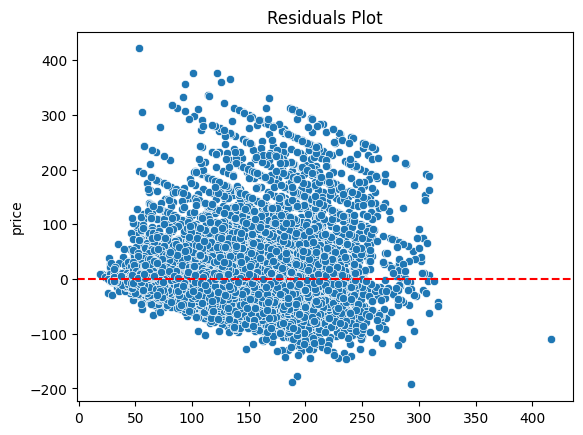

In [97]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.show()